In [1]:
from IPython.display import HTML, Video, clear_output
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import numpy as np
from scipy import signal
# plt.style.use("classic")
# plt.style.use("bmh")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

def showLegend(axs):
	try:
		for ax in axs.flat: ax.legend()
	except TypeError:
		axs.legend()
	except AttributeError:
		axs.legend()


/home/mike/.local/lib/python3.7/site-packages/numba/core/errors.py:175: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [18]:
class Flipper:
	def __init__(self, n_fft, window_size):
		self.n_fft = n_fft
		self.window_size = window_size
		self.hM1 = int(np.floor((window_size + 1) / 2)) # middle (destination)
		self.hM2 = int(np.floor((window_size) / 2)) # middle (source)
		self.hN = self.n_fft // 2

	def flip_signal(self, source):
		r'''center signal around zero'''
		dest = np.zeros(self.n_fft)
		dest[:self.hM1] = source[self.hM2:]
		dest[self.n_fft-self.hM2:] = source[:self.hM2]
		return dest

	def flip_spectrum(self, source):
		r'''make positive freq be on the right side and negative on the left'''
		dest = np.zeros(self.n_fft)
		dest[:self.hN] = source[self.hN:]
		dest[self.n_fft-self.hN:] = source[:self.hN]
		return dest

In [53]:
class FFT:
	def __init__(self, n_fft, window_size):
		self.n_fft = n_fft
		self.window_size = window_size
		self.flipper = Flipper(n_fft, window_size)

	def analyse(self, signal):
		self.signal = signal
		signal_for_fft = self.flipper.flip_signal(signal)
		self.phasor = np.fft.fft(signal_for_fft)
		return self.phasor

	def get_magnitude(self):
		return np.abs(self.phasor)

	def get_log_magnitude(self):
		no_zeros = self.get_magnitude()
		# discard too small values
		no_zeros[no_zeros < np.finfo(float).eps] = np.finfo(float).eps
		return 20 * np.log10(no_zeros)

	def get_phase(self):
		return np.unwrap(np.angle(self.phasor))

	def plot(self, title, mode='log'):
		fig, axs = plt.subplots(1, 2, figsize=(15, 5))
		hN = self.flipper.hN
		x_data = np.arange(-hN, hN) / float(self.n_fft) * window_size
		if mode == 'log':
			magnitude = self.flipper.flip_spectrum(self.get_log_magnitude())
		else:
			magnitude = self.flipper.flip_spectrum(self.get_magnitude())
		axs[0].plot(np.arange(0, self.window_size), self.signal, label='Signal')
		axs[1].plot(x_data, magnitude - np.max(magnitude), label='Spectrum')
		showLegend(axs)
		axs[0].axis([-2, window_size+2, 0, 1.05])
		axs[1].axis([-12, 12, -96, 0])
		fig.suptitle(title, fontsize=16)
		plt.show()

# Оконные функции

In [54]:
window_size = 63
n_fft = 1024

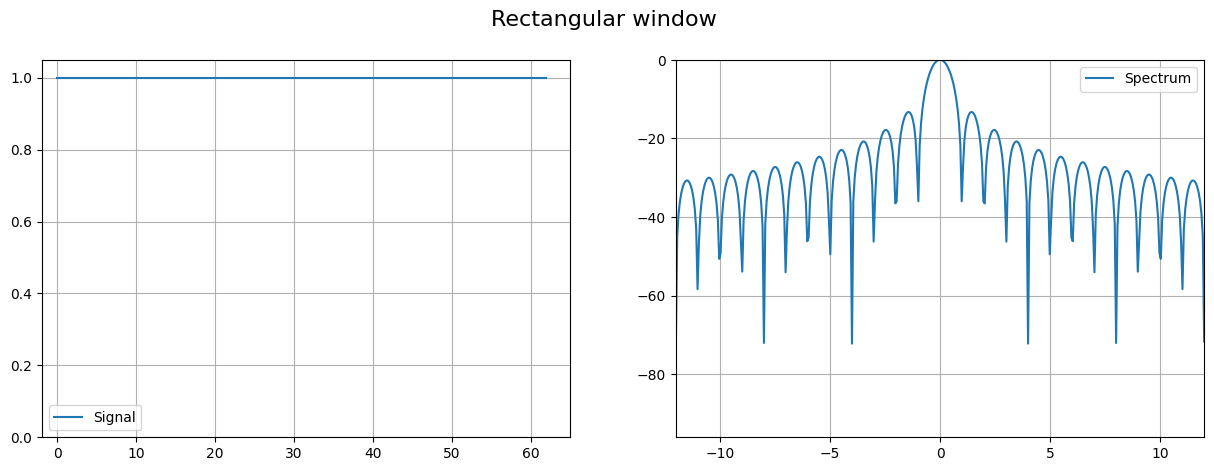

In [55]:
fft = FFT(n_fft, window_size)
window = np.ones(window_size)
fft.analyse(window)
fft.plot('Rectangular window')

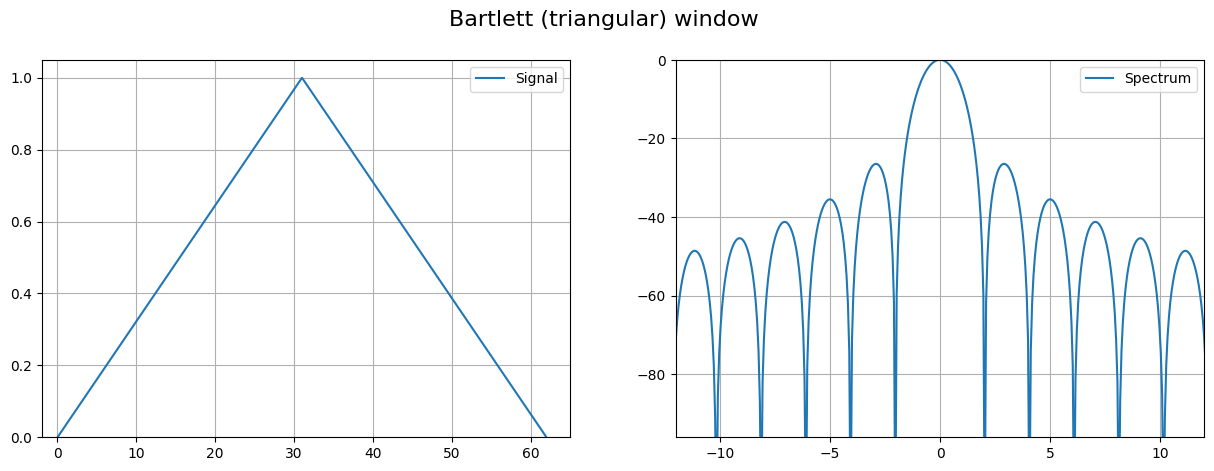

In [56]:
fft = FFT(n_fft, window_size)
window = np.bartlett(window_size)
fft.analyse(window)
fft.plot('Bartlett (triangular) window')

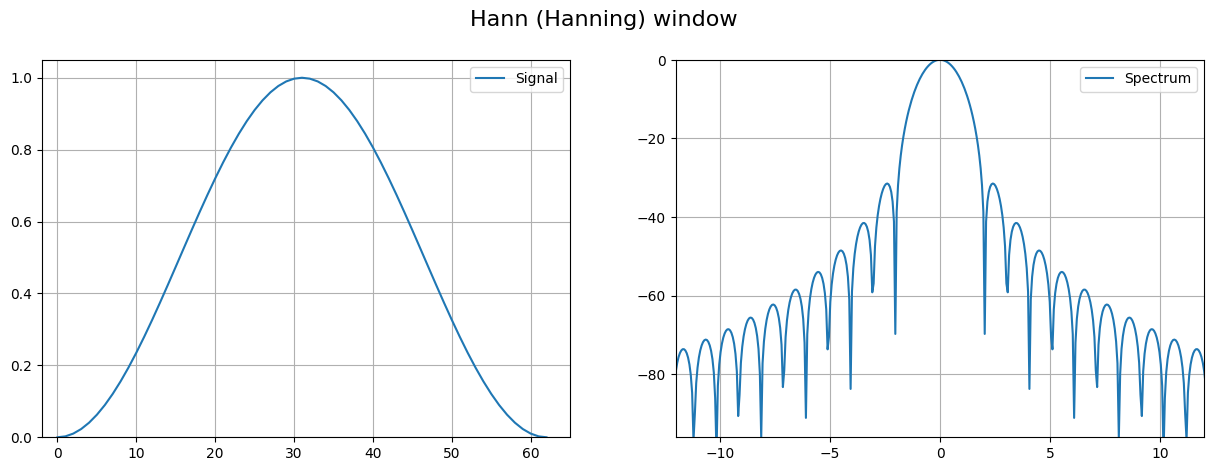

In [57]:
fft = FFT(n_fft, window_size)
window = np.hanning(window_size)
fft.analyse(window)
fft.plot('Hann (Hanning) window')

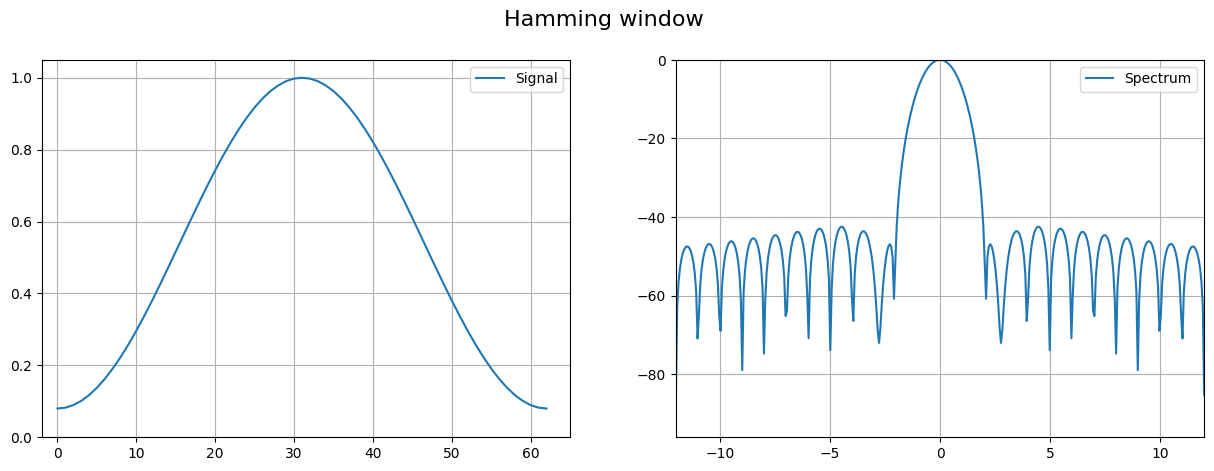

In [58]:
fft = FFT(n_fft, window_size)
window = np.hamming(window_size)
fft.analyse(window)
fft.plot('Hamming window')

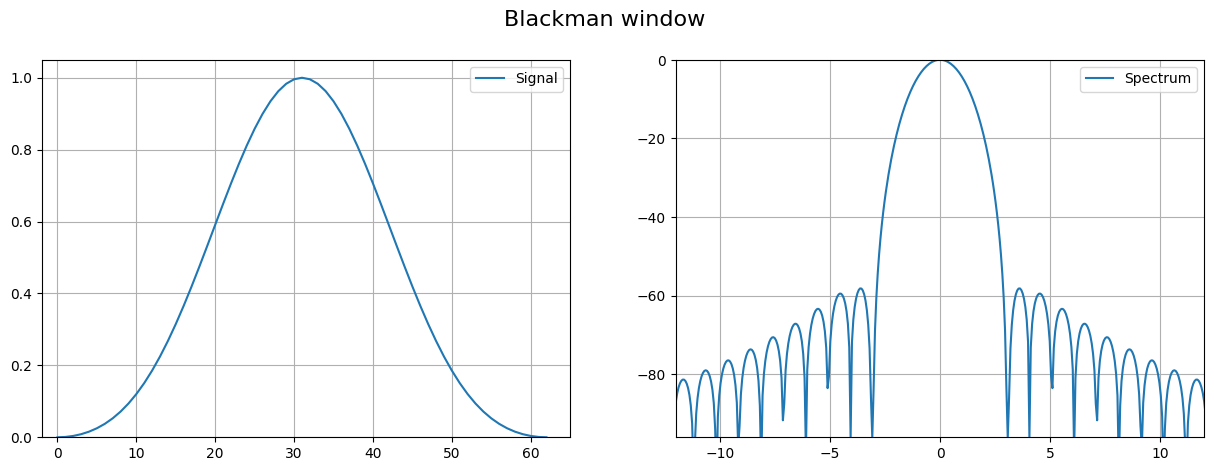

In [59]:
fft = FFT(n_fft, window_size)
window = np.blackman(window_size)
fft.analyse(window)
fft.plot('Blackman window')

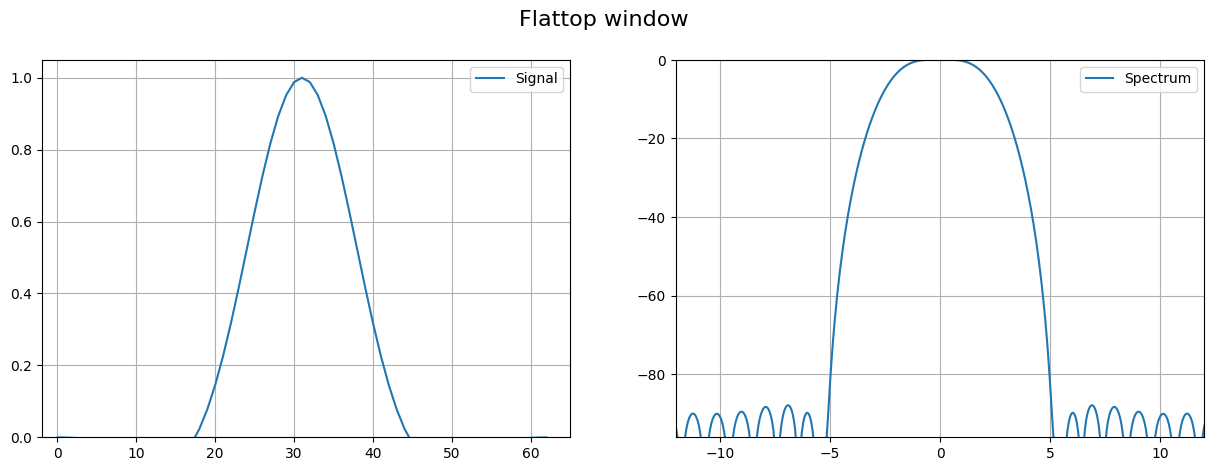

In [60]:
fft = FFT(n_fft, window_size)
window = signal.windows.flattop(window_size)
fft.analyse(window)
fft.plot('Flattop window')

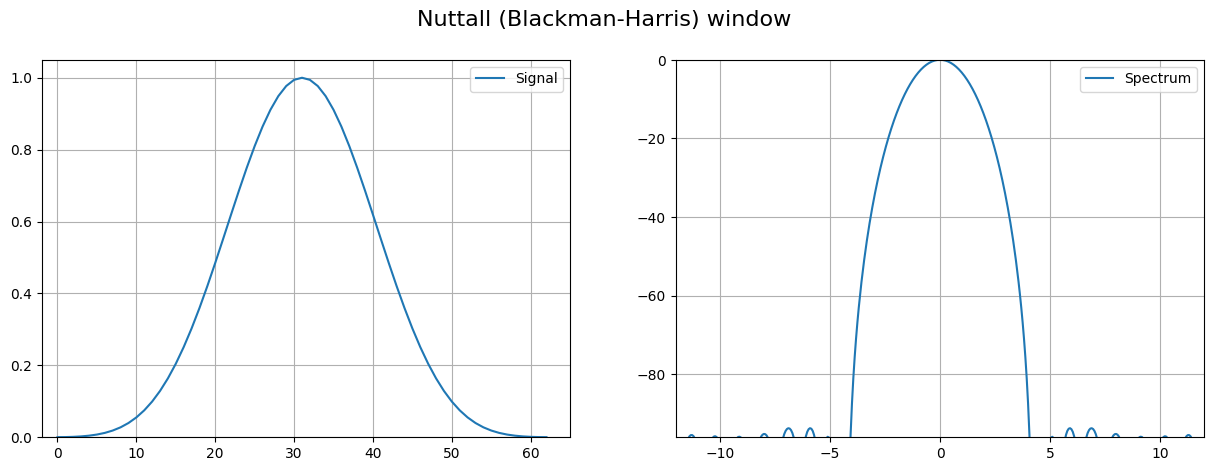

In [61]:
fft = FFT(n_fft, window_size)
window = signal.windows.nuttall(window_size)
fft.analyse(window)
fft.plot('Nuttall (Blackman-Harris) window')